In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [5,5]
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['font.size'] = 10
plt.rcParams['axes.unicode_minus'] = False

%matplotlib inline
%config InlineBackend.figure_format

data = pd.read_csv("https://raw.githubusercontent.com/blueage98/ML/main/titanic/titanic_train.csv")
data.shape


(891, 12)

In [2]:
#feature 삭제
del_feat = ['PassengerId', 'Cabin']
titanic = data.drop(del_feat, axis=1)

qual = ['Survived', 'Pclass','Name', 'Sex', 'Ticket', 'Embarked']
quan = ['SibSp', 'Parch', 'Age', 'Fare']

for col in qual:
    titanic[col] = titanic[col].astype('category')

titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  891 non-null    category
 1   Pclass    891 non-null    category
 2   Name      891 non-null    category
 3   Sex       891 non-null    category
 4   Age       714 non-null    float64 
 5   SibSp     891 non-null    int64   
 6   Parch     891 non-null    int64   
 7   Ticket    891 non-null    category
 8   Fare      891 non-null    float64 
 9   Embarked  889 non-null    category
dtypes: category(6), float64(2), int64(2)
memory usage: 96.2 KB


In [4]:
titanic.describe(include='category')

,Survived,Pclass,Name,Sex,Ticket,Embarked
count,891,891,891,891,891,889
unique,2,3,891,2,681,3
top,0,3,"Abbing, Mr. Anthony",male,1601,S
freq,549,491,1,577,7,644


In [5]:
#도수분포표
freq = pd.DataFrame(titanic.Survived.value_counts())
freq = freq.rename(columns={'count':'도수'})
freq['상대도수'] = titanic.Survived.value_counts(normalize=True)
freq


,도수,상대도수
Survived,,
0,549,0.616162
1,342,0.383838


In [11]:
from scipy.stats import spearmanr, kendalltau

corr, p = spearmanr(titanic.Survived, titanic.Pclass)
print('Spearman 상관계수 : {:.3f}, p-value : {:.3f}'.format(corr, p))

"""
여기서 p-value를 어떻게 이해할 것인가?
p-value는 정규확률분포 상 면적값을 의미한다. 그렇다면 상관계수에서 이 정규확률분포는 어떻게 나오는 것인가?
상관계수의 맥락에서 이해할 때, 지금 상관계수를 구하고자 하는 데이터는 표본의 데이터다.
그런데 이 두 표본의 상관관계에 대한 가설검증을 할 때 아래와 같이 설정한다.
귀무가설 : 두 표본의 상관관계는 0이다.
대립가설 : 두 표본의 상관관계는 0이 아니다.
모집단에는 이 표본 외에도 무한한 표본이 존재할 수 있고, 그 무한한 표본들의 상관계수를 구했을 때, 그 상관계수는 정규분포를 이룰 것이다.
귀무가설이 맞다면, 무한한 표본들의 상관계수는 0을 중심으로 한 정규분포를 이룰 것이고,
이 표본의 상관계수가 갖는 p-value가 이 0을 중심으로 한 정규분포 상에서 양 끝단 5% 미만의 영역이라면,
0을 중심으로 한 정규분포가 아닌, 다른 값을 중심으로 한 정규분포에 속할 가능성이 높다고 판단한다.
이 표본의 상관계수는, 상관계수 0을 중심으로 하는 정규분포 상 어디 쯤 위치하는 지를 나타내는 것이 p-value다.
"""


Spearman 상관계수 : -0.340, p-value : 0.000


'\n여기서 p-value를 어떻게 이해할 것인가?\np-value는 정규확률분포 상 면적값을 의미한다. 그렇다면 상관계수에서 이 정규확률분포는 어떻게 나오는 것인가?\n상관계수의 맥락에서 이해할 때, 지금 상관계수를 구하고자 하는 데이터는 표본의 데이터다.\n그런데 이 두 표본의 상관관계에 대한 가설검증을 할 때 아래와 같이 설정한다.\n귀무가설 : 두 표본의 상관관계는 0이다.\n대립가설 : 두 표본의 상관관계는 0이 아니다.\n모집단에는 이 표본 외에도 무한한 표본이 존재할 수 있고, 그 무한한 표본들의 상관계수를 구했을 때, 그 상관계수는 정규분포를 이룰 것이다.\n귀무가설이 맞다면, 무한한 표본들의 상관계수는 0을 중심으로 한 정규분포를 이룰 것이고,\n이 표본의 상관계수가 갖는 p-value가 이 0을 중심으로 한 정규분포 상에서 양 끝단 5% 미만의 영역이라면,\n0을 중심으로 한 정규분포가 아닌, 다른 값을 중심으로 한 정규분포에 속할 가능성이 높다고 판단한다.\n이 표본의 상관계수는, 상관계수 0을 중심으로 하는 정규분포 상 어디 쯤 위치하는 지를 나타내는 것이 p-value다.\n'

In [25]:
# ------------------------------------------------
#절대적 산포도 
# ------------------------------------------------
#범위
print(titanic.Fare.max() - titanic.Fare.min())
#사분위 범위 (Interquartile range)
iqr = titanic.Fare.quantile(0.75) - titanic.Fare.quantile(0.25)
print(iqr)
#평균편차 (Mean Deviation)
print(np.mean(np.abs(titanic.Fare - titanic.Fare.mean())))
#사분편차 (Qurtaile Deviation)
print(iqr/2)
#분산 (Variance)
print("모분산 %.2f" %(titanic.Fare.var(ddof=0)))    # 자유도는 n
print("표본분산 %.2f" %(titanic.Fare.var(ddof=1)))  # 자유도는 n-1
#표준편차 (Standard Deviation)
print("모 표준편차 %.2f" %(titanic.Fare.std(ddof=0)))
print("표본 표준편차 %.2f" %(titanic.Fare.std(ddof=1)))

512.3292
23.0896
28.163691848778342
11.5448
모분산 2466.67
표본분산 2469.44
모 표준편차 49.67
표본 표준편차 49.69


In [31]:
# ------------------------------------------------
# 상대적 산포도 
# ------------------------------------------------
# 사분위 편차계수 : 사분편차를 중앙값으로 나눈 것
iqr = titanic.Fare.quantile(0.75) - titanic.Fare.quantile(0.25)
print("사분위 편차계수 %.2f" %(iqr/2/titanic.Fare.median()))
# 평균편차 계수 : 평균편차를 산술평균으로 나눈 것
md = np.mean(np.abs(titanic.Fare - titanic.Fare.mean()))
print("평균 편차계수 %.2f" %(md/titanic.Fare.mean()))
# 변동계수 : 표준편차를 산술평균으로 나눈 값
print("변동 계수 %.2f" %(titanic.Fare.std()/titanic.Fare.mean()))

사분위 편차계수 0.80
평균 편차계수 0.87
변동 계수 1.54


In [33]:
titanic.Fare

0       7.2500
1      71.2833
2       7.9250
3      53.1000
4       8.0500
        ...   
886    13.0000
887    30.0000
888    23.4500
889    30.0000
890     7.7500
Name: Fare, Length: 891, dtype: float64

In [57]:
temp = pd.DataFrame(titanic.Fare.value_counts())
temp = temp.reset_index()

#temp.plot(kind='kde', x='Fare', y='count')

titanic.Fare.max()


512.3292

<Axes: xlabel='계급'>

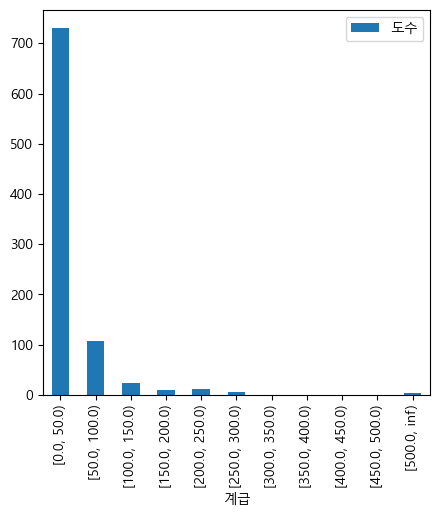

In [64]:
table = pd.cut(titanic.Fare, bins=[0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500, float('inf')], right=False) #right=False면 왼쪽 이상, 오른쪽 미만

# 위 구간들의 열에서 각 구간들의 도수를 뽑아낸다.
freq1 = table.value_counts().reset_index()

# 열의 이름을 계급/도수로 바꾸고, 계급 열을 기준으로 정렬한다.
freq1 = freq1.rename(columns={'Fare':'계급', 'count':'도수'}).sort_values(by='계급')

# 상대도수열을 추가한다.
freq1['상대도수'] = freq1.도수.apply(lambda x : x / freq1.도수.sum())

freq1.plot(kind='bar', x='계급', y='도수')

In [66]:
# ------------------------------------------------
# 상대적 산포도 
# ------------------------------------------------
# 첨도 : 얼마나 뾰족한가. 
# 정규분포의 첨도가 3. 3보다 크다면 꼬리 얇고 뾰족하다. 3보다 작다면 꼬리가 두텁고 덜 뾰족하다.
print(titanic.Fare.kurt())

# 왜도 : 얼마나 치우쳤나?
# 음수면 왼쪽이 긴꼬리. 양수면 오른쪽이 긴꼬리
print(titanic.Fare.skew())

33.39814088089868
4.787316519674893


In [80]:
# ------------------------------------------------
# 피어슨의 적률상관계수 : 양적변수의 상관관계
# ------------------------------------------------
from scipy.stats import pearsonr

tit = titanic.dropna(axis=0)
corr, p = pearsonr(tit.Age, tit.Fare)

print('피어슨 상관계수 : %.3f  p-value : %.3f' %(corr, p))

피어슨 상관계수 : 0.093  p-value : 0.013


(<Figure size 750x500 with 1 Axes>, <Axes: >)

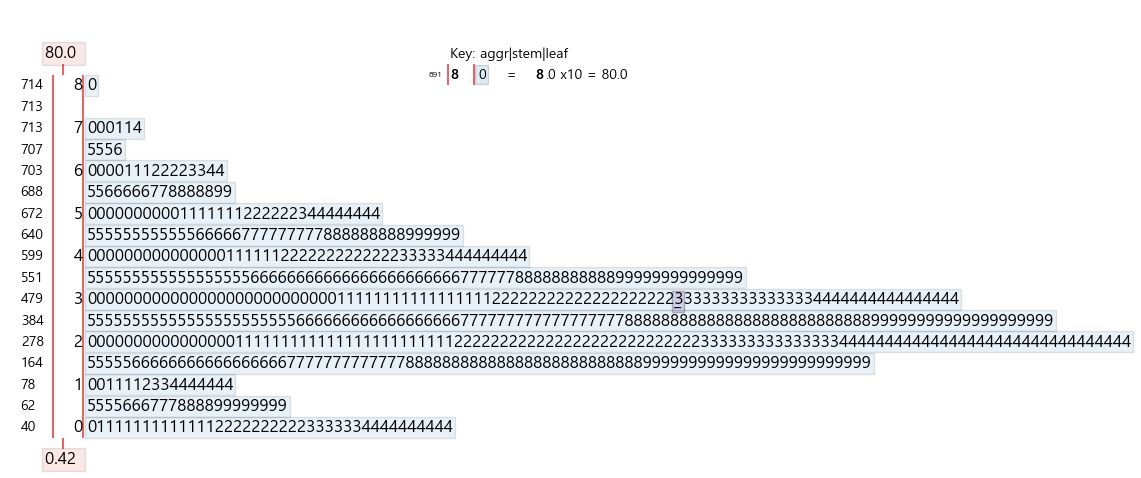

In [4]:
# ------------------------------------------------
# 양적변수의 탐색 및 시각화 : stemgraphic
# ------------------------------------------------
import stemgraphic

stemgraphic.stem_graphic(titanic.Age)

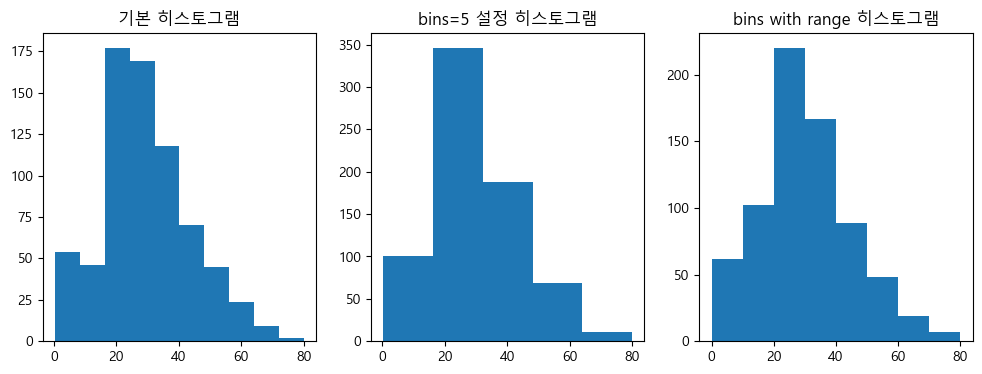

In [7]:

# ------------------------------------------------
# 양적변수의 탐색 및 시각화 : histogram
# ------------------------------------------------
fig, ax = plt.subplots(1, 3, figsize=(12, 4))

ax[0].hist(titanic.Age)
ax[0].set_title('기본 히스토그램')

ax[1].hist(titanic.Age, bins=5)
ax[1].set_title('bins=5 설정 히스토그램')

ax[2].hist(titanic.Age, bins=[i for i in range(0, 90, 10)])
ax[2].set_title('bins with range 히스토그램')

plt.show()

누적도수분포표
         계급   도수  누적도수   계급값
4   [0, 10)   62    62   5.0
2  [10, 20)  102   164  15.0
0  [20, 30)  220   384  25.0
1  [30, 40)  167   551  35.0
3  [40, 50)   89   640  45.0
5  [50, 60)   48   688  55.0
6  [60, 70)   19   707  65.0
7  [70, 80)    6   713  75.0


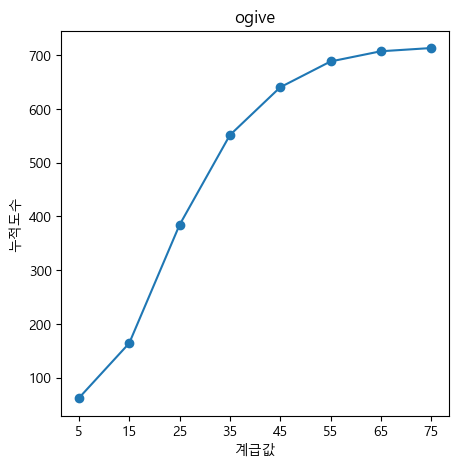

In [29]:
# ------------------------------------------------
# 양적변수의 탐색 및 시각화 : ogive
# ------------------------------------------------
# Age열로 계급, 도수, 누적도수, 계급값

from pandas import cut

ogv = pd.cut(titanic.Age, bins=[i for i in range(0, 90, 10)], right=False)
ogv = ogv.value_counts().reset_index().rename(columns={'Age':'계급', 'count':'도수'}).sort_values(by='계급')
ogv['누적도수'] = ogv.도수.cumsum()
ogv['계급값'] = ogv.계급.apply(lambda x: np.median([x.left, x.right]))

print('누적도수분포표')
print(ogv)

plt.plot(ogv.계급값, ogv.누적도수, marker='o')
plt.xticks(ogv.계급값)
plt.xlabel('계급값')
plt.ylabel('누적도수')
plt.title('ogive')

plt.show()

누적도수분포표
         계급   도수  누적도수   계급값
4   (0, 10]   64    64   5.0
2  (10, 20]  115   179  15.0
0  (20, 30]  230   409  25.0
1  (30, 40]  155   564  35.0
3  (40, 50]   86   650  45.0
5  (50, 60]   42   692  55.0
6  (60, 70]   17   709  65.0
7  (70, 80]    5   714  75.0


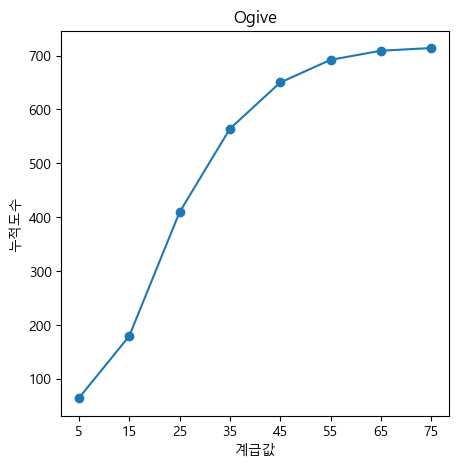

In [38]:
temp = pd.cut(titanic.Age, bins=[i for i in range(0, 90, 10)], right=True)
temp = temp.value_counts().reset_index().rename(columns={'Age':'계급', 'count':'도수'}).sort_values(by='계급')
temp['누적도수'] = temp.도수.cumsum()
temp['계급값'] = temp.계급.apply(lambda x: np.median([x.left, x.right]))

print('누적도수분포표')
print(temp)

plt.plot(temp.계급값, temp.누적도수, marker='o')
plt.xticks(temp.계급값)
plt.xlabel('계급값')
plt.ylabel('누적도수')
plt.title('Ogive')

plt.show()

<Axes: >

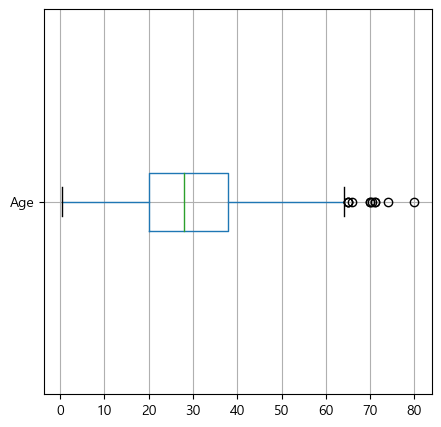

In [41]:
titanic[['Age']].boxplot(vert=False)

Text(0.5, 1.0, 'Scatter corr:0.09 p-value:0.01')

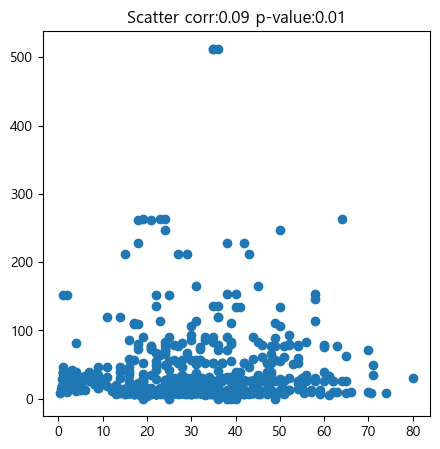

In [63]:
from scipy.stats import pearsonr

tit = titanic.dropna(axis=0)

plt.scatter(tit.Age, tit.Fare)
plt.title('Scatter corr:%.2f p-value:%.2f' %(pearsonr(tit.Age, tit.Fare)))

In [59]:
tit = titanic.dropna(axis=0)
pearsonr(tit.Age, tit.Fare)

PearsonRResult(statistic=0.09314251789411519, pvalue=0.01290455340704146)

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['font.size'] = 12
plt.rcParams['axes.unicode_minus'] = True



df = pd.read_csv('https://raw.githubusercontent.com/algoboni/pythoncodebook1-1/main/practice1_bank.csv')
df.shape

(4521, 11)

In [76]:
data = df.copy()

In [69]:
print(df.job.value_counts())
print(df.marital.value_counts())
print(df.education.value_counts())


job
management       969
blue-collar      946
technician       768
admin.           478
services         417
retired          230
self-employed    183
entrepreneur     168
unemployed       128
housemaid        112
student           84
unknown           38
Name: count, dtype: int64
marital
married     2797
single      1196
divorced     528
Name: count, dtype: int64
education
secondary    2306
tertiary     1350
primary       678
unknown       187
Name: count, dtype: int64


In [68]:
print(df.default.value_counts())
print(df.housing.value_counts())
print(df.loan.value_counts())
print(df.contact.value_counts())

default
no     4445
yes      76
Name: count, dtype: int64
housing
yes    2559
no     1962
Name: count, dtype: int64
loan
no     3830
yes     691
Name: count, dtype: int64
contact
cellular     2896
unknown      1324
telephone     301
Name: count, dtype: int64


In [123]:
from sklearn.preprocessing import LabelEncoder

data = df.copy()

data.drop(['month'], axis=1, inplace=True)

map_education = {'unknown':0, 'primary': 1, 'secondary': 2, 'tertiary': 3}
map_marital = {'single' : 0, 'married' : 1, 'divorced' : 2}
map_default = {'yes':0, 'no':1}
map_housing = {'yes':0, 'no':1}
map_loan = {'yes':0, 'no':1}
map_contact = {'unknown':0,'telephone':1,'cellular':2}
map_y = {'yes':1, 'no':0}

data.default = df.default.map(map_default)
data.education = df.education.map(map_education)
data.marital = df.marital.map(map_marital)
data.default = df.default.map(map_default)
data.housing = df.housing.map(map_housing)
data.loan = df.loan.map(map_loan)
data.contact = df.contact.map(map_contact)
data.y = df.y.map(map_y)

le = LabelEncoder()
data.job = le.fit_transform(data.job)
print(le.classes_)

data.info()



['admin.' 'blue-collar' 'entrepreneur' 'housemaid' 'management' 'retired'
 'self-employed' 'services' 'student' 'technician' 'unemployed' 'unknown']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   age        4521 non-null   int64
 1   job        4521 non-null   int32
 2   marital    4521 non-null   int64
 3   education  4521 non-null   int64
 4   default    4521 non-null   int64
 5   balance    4521 non-null   int64
 6   housing    4521 non-null   int64
 7   loan       4521 non-null   int64
 8   contact    4521 non-null   int64
 9   y          4521 non-null   int64
dtypes: int32(1), int64(9)
memory usage: 335.7 KB


c:\Users\lsel\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\lsel\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<Axes: title={'center': 'log_balance'}, xlabel='job'>

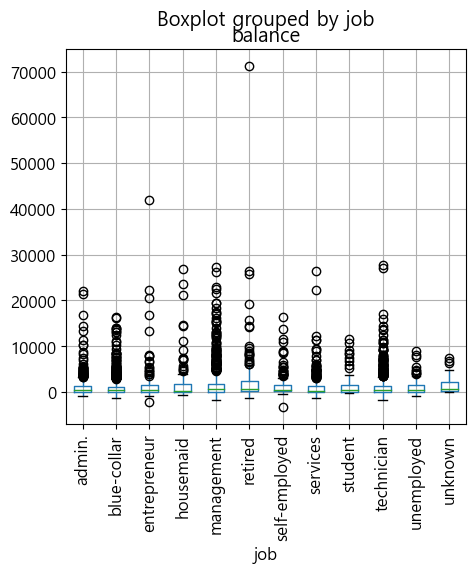

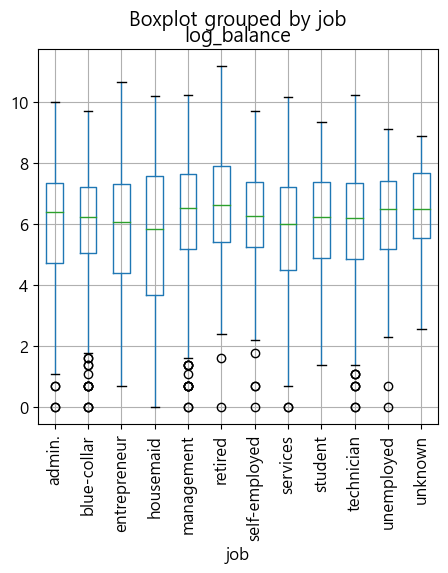

In [130]:


data = df.copy()
data['log_balance'] = np.log(data.balance)

data.boxplot(column='balance', by='job', rot=90)
data.boxplot(column='log_balance', by='job', rot=90)


In [117]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        4521 non-null   int64  
 1   job        4521 non-null   int32  
 2   marital    4521 non-null   int64  
 3   education  4334 non-null   float64
 4   default    4521 non-null   int64  
 5   balance    4521 non-null   int64  
 6   housing    4521 non-null   int64  
 7   loan       4521 non-null   int64  
 8   contact    4521 non-null   int64  
 9   y          4521 non-null   int64  
dtypes: float64(1), int32(1), int64(8)
memory usage: 335.7 KB


([<matplotlib.patches.Wedge at 0x21839fc19d0>,
 [Text(-0.9865600460533295, 0.4865174976619573, ''),
  Text(0.9865600688288559, -0.48651745147774844, '')])

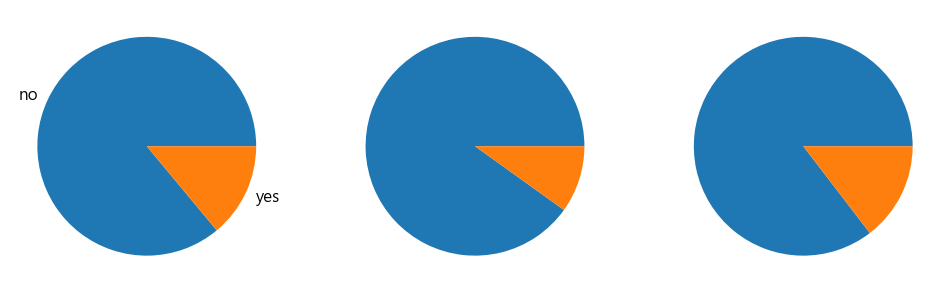

In [100]:
fig, ax = plt.subplots(1, 3, figsize=(12, 4))
ax[0].pie(df_sin.y.value_counts())
ax[1].pie(df_mar.y.value_counts())
ax[2].pie(df_div.y.value_counts())

In [99]:
labels=temp.index
temp

,계급,도수,누적도수,계급값
4,"(0, 10]",64,64,5.0
2,"(10, 20]",115,179,15.0
0,"(20, 30]",230,409,25.0
1,"(30, 40]",155,564,35.0
3,"(40, 50]",86,650,45.0
5,"(50, 60]",42,692,55.0
6,"(60, 70]",17,709,65.0
7,"(70, 80]",5,714,75.0


In [ ]:
#햄버거
10/49 = 0.2     #평균으로부터 0.2분산 만큼 멀다. 

#샌드위치
20/36 = 0.55    #평균으로부터 0.55분산 만큼 멀다.


10 / 2 = 5

8 / 1 = 8 